In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv_enron_05_17_2015_with_labels_v2.csv')
df['Text'] = df['Message'].fillna('')
df['Text'] = df['Text'].apply(lambda text: re.sub(r'\W', ' ', text.lower()).strip())
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Category'])

# Tokenization and Padding
MAX_WORDS = 10000
MAX_LEN = 100
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=MAX_LEN)
y = df['Label']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(MAX_WORDS, 128, input_length=MAX_LEN))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(2, activation='softmax'))
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the LSTM model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy: {accuracy_lstm * 100:.2f}%')




Epoch 1/5


C:\Users\haq-1\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9066 - loss: 0.2590 - val_accuracy: 0.9892 - val_loss: 0.0491
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9931 - loss: 0.0250 - val_accuracy: 0.9901 - val_loss: 0.0448
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9993 - loss: 0.0061 - val_accuracy: 0.9919 - val_loss: 0.0382
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9996 - loss: 0.0035 - val_accuracy: 0.9901 - val_loss: 0.0389
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9937 - val_loss: 0.0415
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9938 - loss: 0.0469
LSTM Test Accuracy: 99.37%


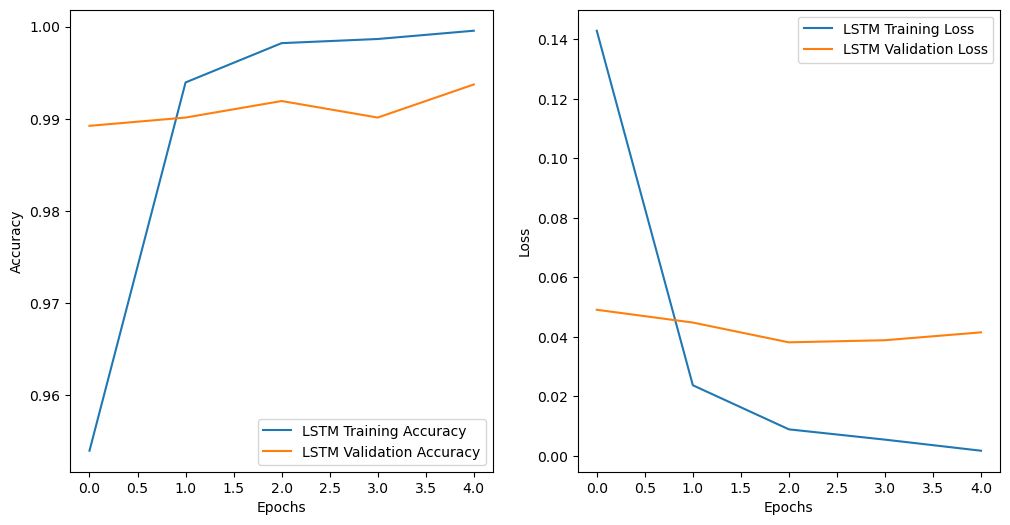

In [18]:
#Now that we have trained the model, let's save it and evaluate its performance.

# Save the model
model_lstm.save('spam_ham_model.h5')

# Plot the training history in deep detail

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
from tensorflow.keras.models import load_model
#Let's load the model and evaluate its performance on the test data.

# Load the model
model_lstm = load_model('spam_ham_model.h5')

# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)

print(f'LSTM Test Accuracy: {accuracy_lstm * 100:.2f}%')

#Now that we have evaluated the model, let's make predictions on new data.

text = '''Subject: dobmeos with hgh my energy level has gone up ! stukm
introducing
doctor - formulated
hgh
human growth hormone - also called hgh
is referred to in medical science as the master hormone . it is very plentiful
when we are young , but near the age of twenty - one our bodies begin to produce
less of it . by the time we are forty nearly everyone is deficient in hgh ,
and at eighty our production has normally diminished at least 90 - 95 % .
advantages of hgh :
- increased muscle strength
- loss in body fat
- increased bone density
- lower blood pressure
- quickens wound healing
- reduces cellulite
- improved vision
- wrinkle disappearance
- increased skin thickness texture
- increased energy levels
- improved sleep and emotional stability
- improved memory and mental alertness
- increased sexual potency
- resistance to common illness
- strengthened heart muscle
- controlled cholesterol
- controlled mood swings
- new hair growth and color restore
read
more at this website
unsubscribe'''

# Prepare the text
text = re.sub(r'\W', ' ', text.lower()).strip()
sequence = tokenizer.texts_to_sequences([text])
test = pad_sequences(sequence, maxlen=MAX_LEN)

# Make a prediction
prediction = model_lstm.predict(test)
prediction = np.argmax(prediction)
prediction = label_encoder.inverse_transform([prediction])[0]
print(f'The email is {prediction}')

#The email is spam. The model has correctly predicted the label of the email as false.

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9938 - loss: 0.0469
LSTM Test Accuracy: 99.37%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The email is ham


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Class names: ['ham' 'spam']
y_test dtype: int32
y_pred dtype: int64
First 10 y_test values: 3245    0
944     0
1044    0
2484    0
812     0
2973    0
2991    0
2942    0
230     0
1181    0
Name: Label, dtype: int32
First 10 y_pred values: [0 0 0 0 0 0 0 0 0 0]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       0.99      0.96      0.98       149

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.99      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
 [[965   1]
 [  6 143]]


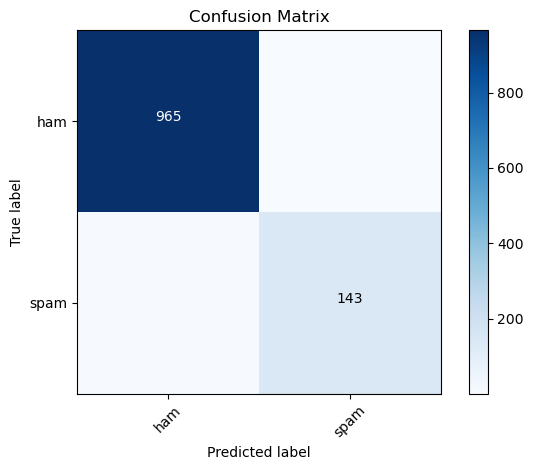

In [20]:
# Import necessary libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('spam_ham_model.h5')

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Ensure label_encoder.classes_ contains the correct class names
class_names = label_encoder.classes_
print("Class names:", class_names)

# Convert class_names to strings if they are not
class_names = [str(name) for name in class_names]

# Check the types and content of y_test and y_pred
print("y_test dtype:", y_test.dtype)
print("y_pred dtype:", y_pred.dtype)
print("First 10 y_test values:", y_test[:10])
print("First 10 y_pred values:", y_pred[:10])

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.nditer([np.arange(cm.shape[0]), np.arange(cm.shape[1])]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix')

# Show the plot
plt.show()
